In [3]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [8]:
merry = np.array([16591, 20264, 5220, 3784, 1068,2613,9615,2436,13174,29578,7004,1514,5524,3029,4984, 2939])
kill= np.array([46700, 58693,11243,10920,2296,5320,25685,8569,35860,77247,17676,4160,14512,7901,15073,7361])

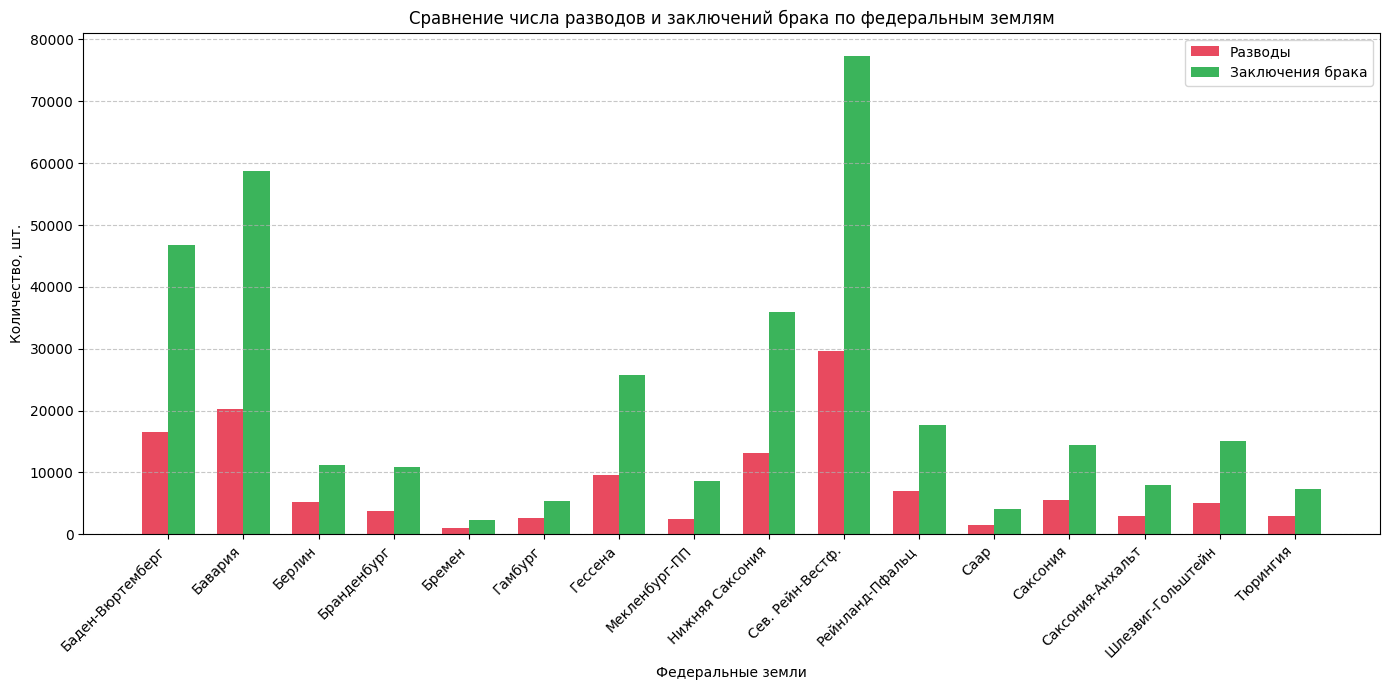

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Подготовка данных (как если бы они были импортированы)
# Названия федеральных земель
federal_lands = np.array([
    'Баден-Вюртемберг', 'Бавария', 'Берлин', 'Бранденбург', 'Бремен', 'Гамбург', 
    'Гессена', 'Мекленбург-ПП', 'Нижняя Саксония', 'Сев. Рейн-Вестф.', 
    'Рейнланд-Пфальц', 'Саар', 'Саксония', 'Саксония-Анхальт', 'Шлезвиг-Гольштейн', 
    'Тюрингия'
])

# Количество разводов (X)
divorces = np.array([
    16591, 20264, 5220, 3784, 1068, 2613, 9615, 2436, 13174, 29578, 
    7004, 1514, 5524, 3029, 4984, 2939
])

# Количество заключений брака (Y)
marriages = np.array([
    46700, 58693, 11243, 10920, 2296, 5320, 25685, 8569, 35860, 77247, 
    17676, 4160, 14512, 7901, 15073, 7361
])

# 2. Настройка графика
x = np.arange(len(federal_lands))  # Позиции для столбцов
width = 0.35  # Ширина столбцов

fig, ax = plt.subplots(figsize=(14, 7))

# Построение столбцов
rects1 = ax.bar(x - width/2, divorces, width, label='Разводы', color='#E84A5F')
rects2 = ax.bar(x + width/2, marriages, width, label='Заключения брака', color='#3BB45B')

# Добавление подписей, заголовка и легенды
ax.set_title('Сравнение числа разводов и заключений брака по федеральным землям')
ax.set_ylabel('Количество, шт.')
ax.set_xlabel('Федеральные земли')
ax.set_xticks(x)
ax.set_xticklabels(federal_lands, rotation=45, ha="right") # Наклон подписей для читаемости
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7) # Сетка только по оси Y

# Функция для добавления числовых меток над столбцами
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Смещение на 3 пункта вертикально
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=7)

# autolabel(rects1) # Можно добавить метки, но они перегружают график
# autolabel(rects2)

plt.tight_layout() # Автоматическая настройка отступов
plt.show()

In [12]:
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from scipy.stats import shapiro


statistic, pvalue = spearmanr(merry, kill, alternative='two-sided')
statistic, pvalue = kendalltau(merry, kill, alternative='two-sided')
differences = merry - kill

# Тест Шапиро-Уилка
statistic, pvalue = shapiro(differences)
print(statistic, pvalue )

0.8000114853241428 0.002724450018689161


In [16]:
from scipy.stats import shapiro

differences = merry - kill

# 2. Вызов функции
statistic_W, pvalue_W = shapiro(
    x=differences # Единственный обязательный параметр
)

print(f"Статистика Шапиро-Уилка (W): {statistic_W:.3f} {pvalue_W}")
from scipy.stats import wilcoxon


statistic, pvalue_W = wilcoxon(
    x=merry,
    y=kill,
    alternative='two-sided'
)
print(f"Статистика (W): {statistic:.3f} {pvalue_W}")

Статистика Шапиро-Уилка (W): 0.800 0.002724450018689161
Статистика (W): 0.000 3.0517578125e-05


In [25]:
merry2 = np.array([4.152625251,4.430018791,3.050798247,4.271052239,3.2572874,2.856276157,4.089451762,5.445485725,4.479986168,4.283301285,4.280349838,4.110099285,3.89927029,3.699668055
,5.093060793
,3.504775799
])
kill2 = np.array([1.47529348,1.529482234,1.416451734,1.480005648,1.515149366,1.40290406,1.530857648,1.548045656,1.645826486,1.640082921,1.696060775,1.495839018,1.366507505
,1.41833876
,1.684058581
,1.39933923
])
kids = np.array([8.670450328,8.632019134,9.157821758,5.927062787,8.868163562,9.424100635,8.452595078,5.819151918,8.201148131,8.46646092,8.137895262,7.475243074
,6.109456163
,5.865338826
,7.352551109
,5.619734921
])

In [27]:
statistic, pvalue = spearmanr(kids, kill2, alternative='two-sided')
print(f"Спирмана: {statistic} pvalue {pvalue}")
statistic, pvalue = kendalltau(kids, kill2, alternative='two-sided')
print(f"Кендалла: {statistic} pvalue {pvalue}")
statistic, pvalue = wilcoxon(kids, kill2, alternative='two-sided')
print(f"Уилкоксона: {statistic} pvalue {pvalue}")

Спирмана: 0.008823529411764706 pvalue 0.9741279946623942
Кендалла: -0.06666666666666667 pvalue 0.7565550254451803
Уилкоксона: 0.0 pvalue 3.0517578125e-05
